In [23]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd

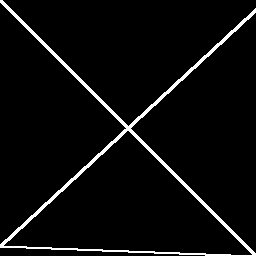

In [22]:
size = (256, 256)

im = Image.new("L", size)

draw = ImageDraw.Draw(im)
draw.line((0, 0) + im.size + (0, im.size[1] - 10, im.size[0] + 10, 0), fill=255, width=3)
im

In [21]:
np.array(im)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [26]:
ts = pd.read_parquet('~/Dokumente/Karten/Playground-Strava-API/Cache/Activity Timeseries/10159108471.parquet')
ts

,latitude,longitude,distance,altitude,heartrate,time
0,50.809960,6.482633,0.0,129.1,81,0
1,50.809960,6.482633,0.0,129.1,80,1
2,50.809960,6.482633,0.0,129.1,83,4
3,50.809960,6.482633,0.0,129.1,81,5
4,50.809960,6.482633,0.0,129.1,83,7
...,...,...,...,...,...,...
4430,50.916185,6.713811,50296.2,86.7,118,19394
4431,50.916186,6.713753,50300.2,86.7,115,19397
4432,50.916186,6.713741,50300.8,86.7,114,19400
4433,50.916185,6.713743,50301.1,86.7,115,19408


In [29]:
from geo_activity_playground.core.tiles import compute_tile_float


tiles = compute_tile_float(ts['latitude'], ts['longitude'], 14)
tiles

(0       8487.031831
 1       8487.031831
 2       8487.031831
 3       8487.031831
 4       8487.031831
            ...     
 4430    8497.552998
 4431    8497.550359
 4432    8497.549813
 4433    8497.549904
 4434    8497.549904
 Name: longitude, Length: 4435, dtype: float64,
 0       5498.710099
 1       5498.710099
 2       5498.710099
 3       5498.710099
 4       5498.710099
            ...     
 4430    5491.050711
 4431    5491.050639
 4432    5491.050639
 4433    5491.050711
 4434    5491.050711
 Name: latitude, Length: 4435, dtype: float64)

In [31]:
xy = np.array(tiles)
xy

array([[8487.03183076, 8487.03183076, 8487.03183076, ..., 8497.54981262,
        8497.54990364, 8497.54990364],
       [5498.71009917, 5498.71009917, 5498.71009917, ..., 5491.05063917,
        5491.05071136, 5491.05071136]])

In [34]:
rel_tile = xy.T - np.floor(xy[:, -1])

In [38]:
pixels = np.round(rel_tile * 256)
pixels

array([[-2552.,  1974.],
       [-2552.,  1974.],
       [-2552.,  1974.],
       ...,
       [  141.,    13.],
       [  141.,    13.],
       [  141.,    13.]])

In [40]:
pixels.flatten()

array([-2552.,  1974., -2552., ...,    13.,   141.,    13.])

In [48]:
np.all((0 <= pixels) & (pixels <= 256), axis=1)

array([False, False, False, ...,  True,  True,  True])

In [49]:
within = pixels[np.all((0 <= pixels) & (pixels <= 256), axis=1)]
within

array([[  0.,  27.],
       [  1.,  28.],
       [  1.,  28.],
       [  2.,  29.],
       [  5.,  29.],
       [ 10.,  29.],
       [ 12.,  30.],
       [ 15.,  30.],
       [ 20.,  31.],
       [ 21.,  31.],
       [ 22.,  31.],
       [ 23.,  31.],
       [ 28.,  32.],
       [ 36.,  31.],
       [ 39.,  31.],
       [ 43.,  30.],
       [ 52.,  29.],
       [ 54.,  29.],
       [ 56.,  29.],
       [ 61.,  28.],
       [ 65.,  28.],
       [ 72.,  28.],
       [ 79.,  28.],
       [ 83.,  29.],
       [ 84.,  29.],
       [ 85.,  29.],
       [ 86.,  29.],
       [ 86.,  29.],
       [ 86.,  29.],
       [ 88.,  29.],
       [ 89.,  29.],
       [ 90.,  29.],
       [ 91.,  28.],
       [ 90.,  24.],
       [ 89.,  18.],
       [ 89.,  12.],
       [ 90.,   8.],
       [ 91.,   7.],
       [ 92.,   6.],
       [ 93.,   6.],
       [ 96.,   6.],
       [ 98.,   6.],
       [102.,   6.],
       [109.,   6.],
       [114.,   5.],
       [114.,   5.],
       [114.,   5.],
       [114.,

In [54]:
ints = list(np.array(within.flatten(), dtype=np.int32))
ints

[0,
 27,
 1,
 28,
 1,
 28,
 2,
 29,
 5,
 29,
 10,
 29,
 12,
 30,
 15,
 30,
 20,
 31,
 21,
 31,
 22,
 31,
 23,
 31,
 28,
 32,
 36,
 31,
 39,
 31,
 43,
 30,
 52,
 29,
 54,
 29,
 56,
 29,
 61,
 28,
 65,
 28,
 72,
 28,
 79,
 28,
 83,
 29,
 84,
 29,
 85,
 29,
 86,
 29,
 86,
 29,
 86,
 29,
 88,
 29,
 89,
 29,
 90,
 29,
 91,
 28,
 90,
 24,
 89,
 18,
 89,
 12,
 90,
 8,
 91,
 7,
 92,
 6,
 93,
 6,
 96,
 6,
 98,
 6,
 102,
 6,
 109,
 6,
 114,
 5,
 114,
 5,
 114,
 5,
 114,
 3,
 114,
 0,
 114,
 1,
 114,
 3,
 113,
 4,
 113,
 5,
 113,
 5,
 113,
 5,
 113,
 5,
 113,
 6,
 113,
 8,
 113,
 9,
 113,
 9,
 113,
 9,
 113,
 9,
 113,
 9,
 113,
 10,
 113,
 11,
 113,
 12,
 112,
 15,
 112,
 17,
 111,
 21,
 111,
 24,
 111,
 25,
 111,
 25,
 111,
 26,
 112,
 27,
 112,
 28,
 112,
 29,
 113,
 30,
 113,
 30,
 113,
 31,
 113,
 31,
 114,
 31,
 114,
 31,
 115,
 32,
 116,
 32,
 118,
 32,
 120,
 31,
 122,
 30,
 124,
 29,
 125,
 29,
 126,
 27,
 128,
 27,
 131,
 26,
 133,
 25,
 135,
 26,
 135,
 26,
 135,
 26,
 136,
 27,
 137,
 

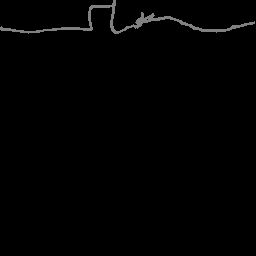

In [56]:
size = (256, 256)

im = Image.new("L", size)

draw = ImageDraw.Draw(im)
draw.line(ints, fill=128, width=3)
im

In [44]:
np.where(np.array(im) > 0)

(array([0, 1, 2, 3, 4, 5]), array([0, 0, 0, 0, 0, 0]))